# Econometrics

## Topic: Factors Affecting The Happy Planet Index (HPI) 

<div align="center">

__Team members:__

| Student name          | Student id |
| --------------------- | ---------- |
| Dương Thị Huyền Trang| 11230593   |
| Lê Lan Hương         | 11230547   |
| Đặng Ngọc Hòa        | 11230537   |
| Nguyễn Thanh Mơ      | 11230571   |
| Phạm Minh Bảo Ngọc   | 11230576   |
| Đỗ Hà Linh           | 11230557   |


### 

# Low Income Group

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_reset
import seaborn as sns
sns.set(style="whitegrid")

**Importing dataset**

In [2]:
file_path = 'econometrics_data.xlsx'  
data = pd.read_excel(file_path)
df = pd.DataFrame(data)
df.head()

,Country Name,ISO,Year,Continent,Population (thousands),Life Expectancy (years),Ladder of life (Wellbeing) (0-10),Carbon Footprint (tCO2e),HPI,GDP per capita ($),GNI,Annual precipitation,Average years of schooling,Gini coefficient,Unemployment,Human Development Index
0,Albania,ALB,2012,Europe,2892.2,78.1,5.51,3.37,51.8,11228,4360,1391.6102,10.025110,0.289605,13.38,0.789
1,Albania,ALB,2014,Europe,2884.1,78.4,4.81,3.60,45.4,11587,4540,1417.2703,10.005746,0.345989,18.05,0.797
2,Albania,ALB,2015,Europe,2882.5,78.6,4.61,3.35,44.4,11878,4390,1184.5548,9.996064,0.327537,17.19,0.797
3,Albania,ALB,2016,Europe,2881.1,78.9,4.51,3.25,43.9,12292,4320,1565.3773,9.986382,0.337363,15.42,0.795
4,Albania,ALB,2017,Europe,2879.4,79.0,4.64,3.68,44.0,12771,4290,1175.3209,9.976700,0.330557,13.62,0.796


**Data Cleaning** 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       619 non-null    object 
 1   ISO                                619 non-null    object 
 2   Year                               619 non-null    int64  
 3   Continent                          619 non-null    object 
 4   Population (thousands)             619 non-null    float64
 5   Life Expectancy (years)            619 non-null    float64
 6   Ladder of life (Wellbeing) (0-10)  619 non-null    float64
 7   Carbon Footprint (tCO2e)           619 non-null    float64
 8   HPI                                619 non-null    float64
 9   GDP per capita ($)                 619 non-null    int64  
 10  GNI                                619 non-null    int64  
 11  Annual precipitation               619 non-null    float64

In [40]:
df.isnull().sum()

Country Name                         0
ISO                                  0
Year                                 0
Continent                            0
Population (thousands)               0
Life Expectancy (years)              0
Ladder of life (Wellbeing) (0-10)    0
Carbon Footprint (tCO2e)             0
HPI                                  0
GDP per capita ($)                   0
GNI                                  0
Annual precipitation                 0
Average years of schooling           0
Gini coefficient                     0
Unemployment                         0
Human Development Index              0
dtype: int64

In [41]:
df = pd.DataFrame(data)
df = df[(df['GNI'] <= 6500)] 

**OLS Regression**

In [42]:
X_ori = df[['Ladder of life (Wellbeing) (0-10)','GNI','Annual precipitation', 
            'Average years of schooling', 'Gini coefficient','Unemployment']]
X_ori = sm.add_constant(X_ori)
y = df["HPI"]
model = sm.OLS(y, X_ori).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     49.35
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           5.24e-35
Time:                        09:01:37   Log-Likelihood:                -551.45
No. Observations:                 180   AIC:                             1117.
Df Residuals:                     173   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

# Model Summary
- R-squared = 0.631, this means, about 63.1% of the variation in the Happy Planet Index (HPI) is explained by the independent variables in the model.
- F-statistic = 49.35 (p < 0.0001) means that the model is statistically significant overall, meaning that at least one predictor has a meaningful impact on HPI.

# Interpretion of each variable
## 1. Ladder of life (wellbeing) (0-10)
- Coefficient = 9.5976, p_value = 0.000
- A 1 increase in point of ladder of life, HPI increases by approximately 9.5976, ceris paribus
- This is the most influential variable in the model (large coefficient and very low p-value), which makes sense—countries where people feel happier tend to score higher on the HPI.

## 2. GNI
- Coefficient = -2.941e-05, p_value = 0.934 (not significiant)
- The effect is almost zero (ceris paribus) and not statistically meaningful (ceris paribus)

## 3. Annual precipitation 
- Coefficient = 0.0029, p_value = 0.000
- An increase of 100 mm in rainfall per year is associated with an increase of about 0.29 HPI points, ceris paribus.
- Natural environmental factors like rainfall can influence agriculture, comfort, or biodiversity, all of which may affect overall sustainability and life satisfaction.

## 4. Average years of schooling
- Coefficient = -0.6637, p_value = 0.016
- A one-year increase in average schooling is associated with a decrease of about 0.66 points in HPI, ceris paribus.
- This result seems counterintuitive. One possible explanation is that education levels may correlate with industrialization or stress, which may negatively impact perceived happiness or environmental sustainability.

## 5. Gini coefficient
- Coefficient = -27.2383, p_value = 0.000
- A 0.01 (1%) increase in the Gini coefficient is associated with a 0.27 point drop in HPI, ceris paribus.
- This means, greater income inequality negatively affects happiness, social trust, and well-being, all of which contribute to a lower HPI.

## 6. Unemployment
- Coefficient = 0.2592, p_value = 0.001
- A 1% increase in the unemployment rate is associated with a 0.26 point increase in HPI, ceris paribus.
- This is surprising and goes against conventional theory. One hypothesis could be that countries with higher unemployment may also have more relaxed lifestyles or cultural factors that contribute positively to perceived happiness (e.g., some Latin American or Caribbean countries).

**Mutilcollinearity**

In [43]:

vif_data = pd.DataFrame()

vif_data["Variable"] = X_ori.columns
vif_data["VIF"] = [variance_inflation_factor(X_ori.values, i)
                   for i in range(X_ori.shape[1])]

print(vif_data)


                            Variable         VIF
0                              const  150.481446
1  Ladder of life (Wellbeing) (0-10)    1.764669
2                                GNI    1.868960
3               Annual precipitation    1.536761
4         Average years of schooling    2.377402
5                   Gini coefficient    2.102416
6                       Unemployment    1.762865


**Ramsey Test**

In [44]:
# Ramsey test
reset_test = linear_reset(model, power=2, use_f=True)
print("F-statistic:", reset_test.fvalue)
print("p-value:", reset_test.pvalue)

F-statistic: 1.589419716675526
p-value: 0.20911655848101618


In [45]:
threshold = 0.05
if reset_test.pvalue > threshold:
  print("No error, no omitted variable")
else:
  print("There's an error and one or many omitted variables")

No error, no omitted variable


**Heteroskedaticity**

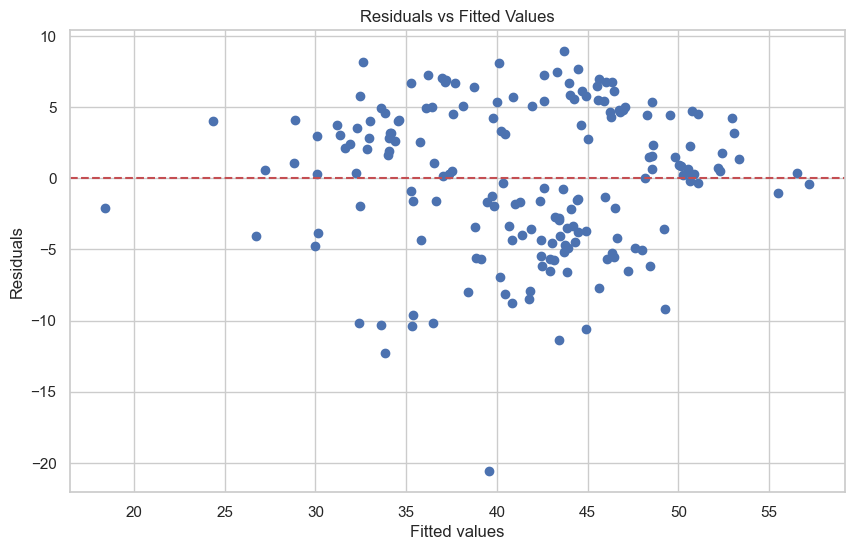

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [47]:
residual_analysis = pd.DataFrame()
residual_analysis['resid_squared'] = model.resid**2

correlations = {}
for var in X_ori.columns:
    if var != 'const':  
        residual_analysis[var] = df[var]
        corr = residual_analysis['resid_squared'].corr(residual_analysis[var])
        correlations[var] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for var, corr in sorted_correlations:
    print(f"{var}: {corr:.4f}")


Annual precipitation: -0.2331
GNI: -0.1961
Unemployment: -0.0744
Gini coefficient: -0.0692
Average years of schooling: 0.0152
Ladder of life (Wellbeing) (0-10): 0.0062


In [48]:
#Breuch-Pagan test; for significant level of 0.05
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

Breusch-Pagan test:
{'Lagrange multiplier statistic': 21.117495561918275, 'p-value': 0.0017475281135107149, 'f-value': 3.832314897448431, 'f p-value': 0.0012970932300864439}
Reject the null hypothesis of homoscedasticity


In [49]:
#Breusch Pagan Test for each variables
bp_results = {}
for var in X_ori.columns:
    if var != 'const': 
        X_single = sm.add_constant(X_ori[[var]])
        bp_test = het_breuschpagan(model.resid, X_single)
        bp_results[var] = bp_test[1]  # p-value

sorted_bp = sorted(bp_results.items(), key=lambda x: x[1])
for var, p_value in sorted_bp:
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var}: p-value = {p_value:.4f} ({significance})")

Annual precipitation: p-value = 0.0018 (Significant)
GNI: p-value = 0.0085 (Significant)
Unemployment: p-value = 0.3185 (Not significant)
Gini coefficient: p-value = 0.3532 (Not significant)
Average years of schooling: p-value = 0.8382 (Not significant)
Ladder of life (Wellbeing) (0-10): p-value = 0.9334 (Not significant)


In [50]:
# White test; for significant level of 0.05 
residuals = model.resid

white_test = sm.stats.diagnostic.het_white(residuals, X_ori)
labels = ['Test Statistic', 'p-value', 'F-statistic', 'F p-value']
print('White Test:')
print(dict(zip(labels, white_test)))
if white_test[1] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

White Test:
{'Test Statistic': 90.19974201370756, 'p-value': 9.855724147779936e-09, 'F-statistic': 5.65467351221673, 'F p-value': 1.2779633517703073e-12}
Reject the null hypothesis of homoscedasticity


We have two ways to solve the heteroskedasticity

**1. Robust Standard Errors**

In [51]:
robust_model = sm.OLS(y, X_ori).fit(cov_type='HC3')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     90.20
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.22e-50
Time:                        09:01:38   Log-Likelihood:                -551.45
No. Observations:                 180   AIC:                             1117.
Df Residuals:                     173   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Interpret
After applying robust standard errors to address heteroskedasticity:

- Coefficients remain unchanged.
- Standard errors changed, especially for Average years of schooling (increased).
- P-value for Average years of schooling rose from 0.016 to 0.055 → lost significance at the 5% level.
- Other variables’ significance mostly unchanged.

This means, schooling may not have a clear direct impact on happiness (HPI); quality and access matter more. Thus, when designing policies, one should not assume that investing in education will directly and clearly improve HPI — factors like education quality and equal access should also be considered.

**Conclusion**: Robust errors reveal that some effects (like education) are less certain than initially estimated.

Text(0.5, 1.0, 'Histogram')

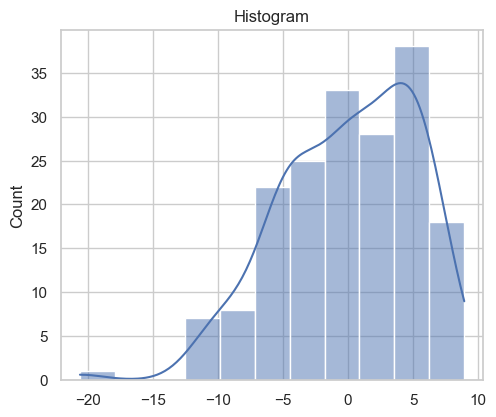

In [52]:

# Histogram of residuals
residuals = model.resid
plt.figure(figsize=(12, 10))
plt.subplot(221)
sns.histplot(residuals, kde=True)
plt.title(f'Histogram')

**2. Remove variable and standard**

In [53]:
df = pd.DataFrame(data)
df = df[(df['GNI'] <= 6500)] 

In [54]:
df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
df['ln_GNI'] = np.log(df['GNI'])
df['ln_HPI'] = np.log(df['HPI'])

X = df[['Ladder of life (Wellbeing) (0-10)','ln_GNI', 'Average years of schooling', 'Gini coefficient']]
y = df["ln_HPI"]
X = sm.add_constant(X)
model_wls = sm.OLS(y, X).fit()
print(model_wls.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_HPI   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     50.89
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           2.30e-28
Time:                        09:01:38   Log-Likelihood:                 82.775
No. Observations:                 180   AIC:                            -155.6
Df Residuals:                     175   BIC:                            -139.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Model summary:
- R_squared = 0.538: About 53.8% of the variation in the log of the Happy Planet Index (ln_HPI) is explained by the independent variables in the model.
- F-statistic = 50.89 (p < 0.0001): The model is statistically significant overall, meaning that at least one predictor has a meaningful impact on ln_HPI.

## Interpret each variables:
### 1. Ladder of life (Wellbeing) (0–10): 
- Coefficient: 0.2022, p-value: 0.000
- When individual happiness increases by 1 point, HPI increases by approximately 20.23%, ceris paribus (since HPI is log-transformed). 
- This indicates that people's life satisfaction plays an important role in sustainable development.
  
### 2. ln_GNI (log of Gross National Income per capita)
- Coefficient: 0.1067, p_value = 0.005
-  A 1% increase in GNI leads to an approximate 0.1062% increase in HPI, ceris paribus. 
- This suggests that wealthier nations tend to achieve higher HPI, though the impact is not particularly large.
- Income has a positive but relatively smaller impact on happiness compared to wellbeing. This aligns with the idea that income contributes to happiness, but isn't the main driver.

### 3. Average years of schooling
- Coefficient: -0.0149, p-value: 0.07
- Although the direction is negative (higher education → lower HPI), there's insufficient statistical evidence to confirm the effect( ceris paribus).

### 4. Gini
- Coefficient: -0.0275, p_value: 0.168
- Although the direction is negative (higher inequality → lower HPI), there's insufficient statistical evidence to confirm the effect(ceris paribus).

# **Variable Insight**
1. Wellbeing (Ladder of Life): Strong positive and significant in both models.

2. GNI:

- HC3: p = 0.937 → not significant

- Log model: p = 0.005 → significant
→ Income has a clearer impact when outliers are removed and log is applied.

3. Schooling: Remains borderline; no strong evidence in either.

4. Gini:

- HC3: very significant

- Log model: becomes insignificant
→ Gini’s effect may be driven by high-income countries.


**Conclusion**:  Income matters more in mid-range economies; Gini less so after controlling for extreme values. This means, preprocessing (log, outlier removal) clarifies true drivers of happiness.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)

                            Variable         VIF
0                              const  368.416774
1  Ladder of life (Wellbeing) (0-10)    1.520755
2                             ln_GNI    2.253683
3         Average years of schooling    2.471039
4                   Gini coefficient    1.782262


In [56]:
#Breuch-Pagan test; for significant level of 0.05

bp_test = sm.stats.diagnostic.het_breuschpagan(model_wls.resid, model_wls.model.exog) #p_value có tăng so với không chia data
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
bp_results = [float(value) for value in bp_test]
res = dict(zip(labels, bp_results))

print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

Breusch-Pagan test:
{'Lagrange multiplier statistic': 5.4863844027108915, 'p-value': 0.24092889652130683, 'f-value': 1.3754188565578598, 'f p-value': 0.2443604966296758}


In [57]:
# White test; for significant level of 0.05 
import statsmodels.stats.diagnostic as smd
residuals = model_wls.resid

white_test = smd.het_white(residuals, X)
labels = ['Test Statistic', 'p-value', 'F-statistic', 'F p-value']
print('White Test:')
white_results = [float(value) for value in white_test]
print(dict(zip(labels, white_results)))
if white_test[1] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

White Test:
{'Test Statistic': 15.893089107615788, 'p-value': 0.3199467559199396, 'F-statistic': 1.141398654823196, 'F p-value': 0.32583859328935794}


#  **Result model**
### ln(HPI) = 1.9889 + 0,2022.WB + 0,1077.ln(GNI) + ε

# Middle income countries

In [58]:
df = pd.DataFrame(data)
df = df[(df['GNI'] >= 6500) & (df['GNI'] <=31000)]

In [59]:
df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
df['ln_GNI'] = np.log(df['GNI'])
df['stan_gini'] = df['Gini coefficient'] * 10
df['ln_HPI'] = np.log(df['HPI'])
X_ori = df[['Ladder of life (Wellbeing) (0-10)','Average years of schooling','ln_Annual precipitation', 'stan_gini','Unemployment']]
y = df["HPI"]
X_ori = sm.add_constant(X_ori)
model = sm.OLS(y, X_ori).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           8.65e-72
Time:                        09:01:38   Log-Likelihood:                -734.76
No. Observations:                 258   AIC:                             1482.
Df Residuals:                     252   BIC:                             1503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Model Summary:
- R-squared = 0.741 → The model explains 74.1% of the variation in the Happiness Index (HPI).
- Data is filtered for middle-income countries (GNI between 6,500 and 31,000), with log-transformed and standardized variables to handle heteroskedasticity.

## Interpretation of each variable:
1. Ladder of life (Wellbeing)
- Coefficient: 6.804, p-value: 0.000 (significant)
- A 1-point increase in self-perceived wellbeing increases HPI by 6.8 points, ceris paribus. This is a strong, direct, and highly significant relationship.
- Thus, policymakers should prioritize improving subjective wellbeing (e.g., mental health support, life satisfaction programs), as it's the most influential driver of happiness.

2. Average years of schooling
- Coefficient: -1.582, p-value: 0.000 (significant)
- Surprisingly, more years of schooling are associated with a decrease in HPI, ceris paribus. This may indicate that longer education can lead to academic pressure, stress, or inequality of opportunity.
- Investing in education should go beyond just quantity (more years) and focus on quality, mental wellbeing in schools, and equal access to avoid unintended negative impacts on happiness.

3. ln_Annual precipitation
- Coefficient: 4.883, p-value: 0.000 (significant)
- A 1-unit increase in log precipitation (approx. 2.7x increase in actual rainfall) correlates with a 4.88-point increase in HPI, ceris paribus. This suggests a positive link between climate/environmental conditions and happiness.
- Countries with favorable climates may have an environmental advantage for wellbeing. Urban planning, climate adaptation, and green infrastructure should be considered in happiness-oriented development.

4. stan_gini (Standardized Gini coefficient)
- Coefficient: -0.850, p-value: 0.511 (not significant)
- Although inequality shows a negative effect, it's not statistically significant in this model, ceris paribus. Inequality might not strongly affect happiness in middle-income contexts, or the effect may be masked by other factors.

5. Unemployment
- Coefficient: 0.1489, p-value: 0.004 (significant)
- Unexpectedly, higher unemployment is associated with higher HPI. This might reflect confounding factors, such as strong social safety nets, cultural attitudes, or informal labor markets (ceris paribus)
- Be cautious when interpreting this variable. Unemployment support, quality of work, and job security might be more relevant than just unemployment rate itself. Further model refinement is advised.

In [60]:

vif_data = pd.DataFrame()

vif_data["Variable"] = X_ori.columns
vif_data["VIF"] = [variance_inflation_factor(X_ori.values, i)
                   for i in range(X_ori.shape[1])]

print(vif_data)

                            Variable         VIF
0                              const  374.041710
1  Ladder of life (Wellbeing) (0-10)    1.306062
2         Average years of schooling    1.993526
3            ln_Annual precipitation    1.910967
4                          stan_gini    3.001063
5                       Unemployment    1.098305


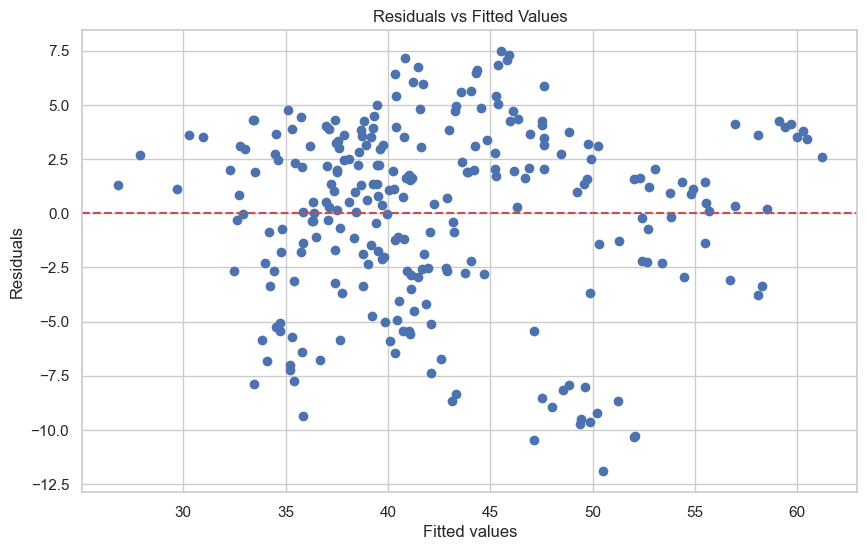

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [62]:
residual_analysis = pd.DataFrame()
residual_analysis['resid_squared'] = model.resid**2

correlations = {}
for var in X_ori.columns:
    if var != 'const':  
        residual_analysis[var] = df[var]
        corr = residual_analysis['resid_squared'].corr(residual_analysis[var])
        correlations[var] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for var, corr in sorted_correlations:
    print(f"{var}: {corr:.4f}")

Ladder of life (Wellbeing) (0-10): 0.1445
Unemployment: -0.1321
Average years of schooling: -0.1225
stan_gini: -0.0553
ln_Annual precipitation: 0.0079


In [63]:
#Breuch-Pagan test; for significant level of 0.05
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
res = dict(zip(labels, bp_test))
print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

Breusch-Pagan test:
{'Lagrange multiplier statistic': 25.4258767917208, 'p-value': 0.00011527815259341873, 'f-value': 5.5099173228103595, 'f p-value': 7.807308155918699e-05}
Reject the null hypothesis of homoscedasticity


In [64]:
#Breusch Pagan Test for each variables
bp_results = {}
for var in X_ori.columns:
    if var != 'const': 
        X_single = sm.add_constant(X_ori[[var]])
        bp_test = het_breuschpagan(model.resid, X_single)
        bp_results[var] = bp_test[1]  # p-value

# Hiển thị kết quả theo thứ tự tăng dần của p-value
sorted_bp = sorted(bp_results.items(), key=lambda x: x[1])
for var, p_value in sorted_bp:
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var}: p-value = {p_value:.4f} ({significance})")

Ladder of life (Wellbeing) (0-10): p-value = 0.0203 (Significant)
Unemployment: p-value = 0.0339 (Significant)
Average years of schooling: p-value = 0.0491 (Significant)
stan_gini: p-value = 0.3747 (Not significant)
ln_Annual precipitation: p-value = 0.8992 (Not significant)


In [65]:
# White test; for significant level of 0.05 
residuals = model.resid

white_test = sm.stats.diagnostic.het_white(residuals, X_ori)
labels = ['Test Statistic', 'p-value', 'F-statistic', 'F p-value']
print('White Test:')
print(dict(zip(labels, white_test)))
if white_test[1] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

White Test:
{'Test Statistic': 130.34391602191585, 'p-value': 3.3598061931384307e-18, 'F-statistic': 12.09950483147261, 'F p-value': 2.6155718188966304e-26}
Reject the null hypothesis of homoscedasticity


We employed various weighting strategies to address heteroskedasticity; however, none proved effective.

In [66]:
robust_model = sm.OLS(y, X_ori).fit(cov_type='HC3')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.25e-81
Time:                        09:01:39   Log-Likelihood:                -734.76
No. Observations:                 258   AIC:                             1482.
Df Residuals:                     252   BIC:                             1503.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Interpretation
After correcting for heteroskedasticity, most results remain stable:

1. Wellbeing: Strong positive impact on HPI (coef ≈ 6.8, p < 0.001). This means, higher life satisfaction leads to higher happiness index.
2. Schooling years: Significant negative effect (coef ≈ -1.58, p < 0.001). Meaning that more schooling may reduce happiness, possibly due to stress or inequality.
3. Log precipitation: Positive and significant (coef ≈ 4.88, p < 0.001). Better natural conditions are linked to higher well-being.
4. Gini (income inequality): Not significant before or after (p > 0.3). No clear link with happiness.
5. Unemployment: Positive and significant (coef ≈ 0.15, p ≈ 0.002). This is unexpected results; may reflect stronger welfare systems or hidden effects.

**Conclusion**: Main results are robust; heteroskedasticity correction improves reliability but doesn't change key interpretations.

Text(0.5, 1.0, 'Histogram')

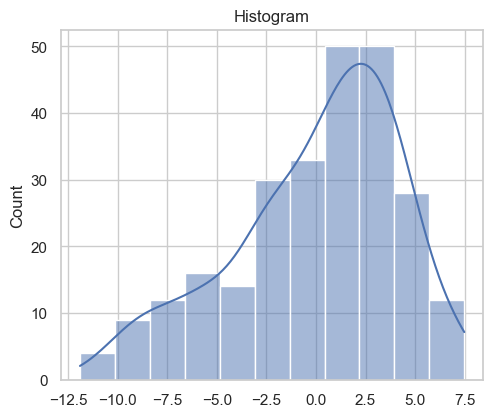

In [67]:
# Histogram of residuals
residuals = model.resid
plt.figure(figsize=(12, 10))
plt.subplot(221)
sns.histplot(residuals, kde=True)
plt.title(f'Histogram')

# **Result model**
### HPI = -15,0488 + 6,8049.WB - 1,5082.AYS + 4,8835.ln(Annpre) + 0,1489.Umemploy + ε

# High income countries

In [68]:
df = pd.DataFrame(data)
df = df[(df['GNI'] >= 31000)]

**OLS Regression**

In [69]:
#for better estimation, we standardize some variables that has the large range of value as bellow
df["ln_Annual precipitation"]= np.log(df["Annual precipitation"])
df['ln_GNI'] = np.log(df['GNI'])
df['ln_HPI'] = np.log(df['HPI'])
x_beg = df[['Carbon Footprint (tCO2e)','GDP per capita ($)', 'ln_Annual precipitation','Unemployment']]
y = df['ln_HPI']
x_beg = sm.add_constant(x_beg)
model = sm.OLS(y, x_beg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_HPI   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     889.2
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          5.50e-116
Time:                        09:01:39   Log-Likelihood:                 315.57
No. Observations:                 182   AIC:                            -621.1
Df Residuals:                     177   BIC:                            -605.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Model Summary
- R-squared = 0.953 and Adjusted R-squared = 0.952 → The model explains 95.2% of the variation in ln_HPI. This indicates an excellent model fit.
- F-statistic = 889.2, and P-value = 5.50e-116 → The regression model is statistically significant.

# Interpretation of each variable:
1. Carbon Footprint (tCO2e)
- Coefficient = -0.0304, p-value = 0.000
- A 1-ton increase in CO₂ emissions per capita is associated with approximately a 3.04% decrease in HPI, ceris paribus.
- This suggests that higher carbon emissions negatively impact sustainable well-being.
- Countries with higher carbon emissions often suffer from environmental issues such as pollution and climate change, which reduce the quality of life and health, ultimately lowering the HPI.

2. GDP per capita ($)
- Coefficient = 1.434e-06, p-value = 0.000
- A $1 increase in GDP per capita leads to an estimated 0.0001434% increase in HPI, ceris paribus. While the effect is statistically significant, its magnitude is very small.
- Although higher income can improve living standards, it doesn’t necessarily lead to higher happiness or well-being. This reflects the idea that economic growth alone is not enough to improve sustainable happiness.

3. ln_Annual precipitation (log of annual rainfall)
- Coefficient = -0.0179, p-value = 0.024
- A 1% increase in annual precipitation is associated with a 0.0179% decrease in HPI, ceris paribus.
- Excessive rainfall or extreme weather may cause natural disasters (flooding, landslides), disrupt agriculture, or lower daily living conditions — leading to a decline in well-being and reduced life satisfaction, thus lowering HPI.

4. Unemployment
- Coefficient = -0.0065, p-value = 0.000
-  A 1 percentage point increase in the unemployment rate leads to a 0.65% decrease in HPI, ceris paribus. This indicates a clear negative social impact.
- Unemployment not only reduces income but also increases mental stress and reduces life satisfaction. It undermines both physical and mental health, leading to lower happy life years and ultimately reducing HPI.

In [70]:

vif_data = pd.DataFrame()
#X = X_ori.drop('const', axis=1)
vif_data["Variable"] = x_beg.columns
vif_data["VIF"] = [variance_inflation_factor(x_beg.values, i)
                   for i in range(x_beg.shape[1])]

print(vif_data)

                   Variable         VIF
0                     const  254.503221
1  Carbon Footprint (tCO2e)    2.599892
2        GDP per capita ($)    2.907730
3   ln_Annual precipitation    1.228740
4              Unemployment    1.079677


In [71]:
# Ramsey test
reset_test = linear_reset(model, power=2, use_f=True)
print("F-statistic:", reset_test.fvalue)
print("p-value:", reset_test.pvalue)

F-statistic: 0.5922919684040548
p-value: 0.44256585990918595


In [72]:
threshold = 0.05
if reset_test.pvalue > threshold:
  print("No error, no omitted variable")
else:
  print("There's an error and one or many omitted variables")

No error, no omitted variable


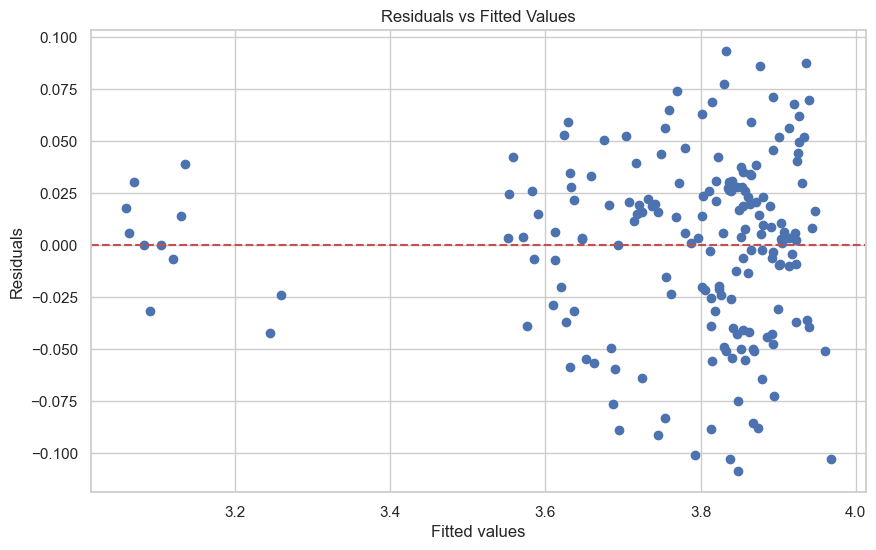

In [73]:
# 1. Visual inspection of residuals
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Correlation values between each independent variable and the squared residuals**

In [74]:
# Tạo DataFrame chứa bình phương phần dư và các biến độc lập
residual_analysis = pd.DataFrame()
residual_analysis['resid_squared'] = model.resid**2

# Tính hệ số tương quan
correlations = {}
for var in x_beg.columns:
    if var != 'const':  
        residual_analysis[var] = df[var]
        corr = residual_analysis['resid_squared'].corr(residual_analysis[var])
        correlations[var] = corr


# Hiển thị kết quả tương quan
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
for var, corr in sorted_correlations:
    print(f"{var}: {corr:.4f}")


Unemployment: 0.1711
Carbon Footprint (tCO2e): -0.1694
GDP per capita ($): -0.0809
ln_Annual precipitation: 0.0145


Absolute correlation close to 0 means less siginficant impact on heteroskedasticity

**Carbon Footprint**, **GNI** are more likely to contribute to heteroskedasticity.

In [75]:
#Breuch-Pagan test; for significant level of 0.05

bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog) #p_value có tăng so với không chia data
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("Breusch-Pagan test:")
bp_results = [float(value) for value in bp_test]
res = dict(zip(labels, bp_results))

print(res)
if res['p-value'] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

Breusch-Pagan test:
{'Lagrange multiplier statistic': 10.873077516936325, 'p-value': 0.02802809657830415, 'f-value': 2.8115604087489516, 'f p-value': 0.026965680720129982}
Reject the null hypothesis of homoscedasticity


In [76]:
#Breusch Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

# Kiểm định riêng lẻ cho từng biến. Với mỗi biến var, tạo một mô hình hồi quy đơn biến để test:
bp_results = {}
for var in x_beg.columns:
    if var != 'const': 
        X_single = sm.add_constant(df[[var]])
        bp_test = het_breuschpagan(model.resid, X_single)
        bp_results[var] = bp_test[1]  # p-value

# Hiển thị kết quả theo thứ tự tăng dần của p-value
sorted_bp = sorted(bp_results.items(), key=lambda x: x[1])
for var, p_value in sorted_bp:
    significance = "Significant" if p_value < 0.05 else "Not significant"
    print(f"{var}: p-value = {p_value:.4f} ({significance})")

Unemployment: p-value = 0.0210 (Significant)
Carbon Footprint (tCO2e): p-value = 0.0223 (Significant)
GDP per capita ($): p-value = 0.2748 (Not significant)
ln_Annual precipitation: p-value = 0.8451 (Not significant)


p-value Analysis for Heteroskedasticity:

If p-value < 0.05: This indicates the presence of heteroskedasticity (result: "Significant").

If p-value ≥ 0.05: There is not enough evidence to reject the null hypothesis (result: "Not significant").

**Analysis Conclusion:**
The analysis shows that variables **Carbon Footprint, GNI** have a significant impact on heteroskedasticity. 

In [77]:
residuals = model.resid

white_test = smd.het_white(residuals, x_beg)
labels = ['Test Statistic', 'p-value', 'F-statistic', 'F p-value']
print('White Test:')
white_results = [float(value) for value in white_test]
print(dict(zip(labels, white_results)))
if white_test[1] < 0.05:
    print("Reject the null hypothesis of homoscedasticity")

White Test:
{'Test Statistic': 46.65445243331981, 'p-value': 2.1905814264341037e-05, 'F-statistic': 4.111852796912762, 'F p-value': 3.867073523880241e-06}
Reject the null hypothesis of homoscedasticity


In [78]:
robust_model = sm.OLS(y, x_beg).fit(cov_type='HC3')
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_HPI   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1904.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          3.01e-144
Time:                        09:01:39   Log-Likelihood:                 315.57
No. Observations:                 182   AIC:                            -621.1
Df Residuals:                     177   BIC:                            -605.1
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Interpretation:
- After correcting for heteroskedasticity using robust standard errors, the coefficients remain unchanged, but standard errors increased slightly. All variables stay statistically significant.
- Carbon Footprint: More emissions reduce happiness.
- GDP per capita: Higher income slightly improves well-being.
- Annual Precipitation (log): More rain lowers happiness, possibly due to discomfort or floods.
- Unemployment: Higher unemployment significantly reduces happiness.

**Conclusion**: Robust results confirm the model’s reliability and improve the accuracy of statistical inference.

Text(0.5, 1.0, 'Histogram')

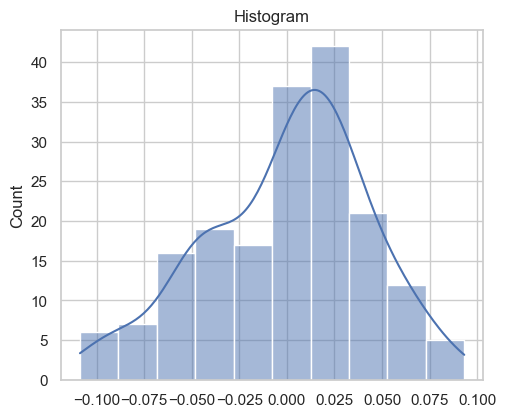

In [79]:
# Histogram of residuals
residuals = model.resid
plt.figure(figsize=(12, 10))
plt.subplot(221)
sns.histplot(residuals, kde=True)
plt.title(f'Histogram')

# **Result model**
### ln(HPI) = 4,2994 - 0,0304.FB + (1,434e-06).GDP - 0,0179.ln(Annpre) - 0,0065.Umemploy + ε